In [1]:
import pandas as pd
import warnings

train_low_data = pd.read_csv("./kaggle/titanic/train.csv")
test_low_data = pd.read_csv("./kaggle/titanic/test.csv")

print(train_low_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [2]:
test_passenger_ids = test_low_data['PassengerId']

In [3]:
train_low_data = train_low_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_low_data = test_low_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

train_low_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [4]:
train_low_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
test_low_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [6]:
train_low_data.dropna(inplace=True)

In [7]:
print(train_low_data.shape)

(712, 8)


In [8]:
train_low_data = pd.get_dummies(train_low_data, columns=['Sex', 'Embarked'])
test_low_data = pd.get_dummies(test_low_data, columns=['Sex', 'Embarked'])

In [9]:
train_low_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,True,False,False,True,False
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [10]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = train_low_data.drop(columns=['Survived'])
y = train_low_data['Survived']

x_test_data = test_low_data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
830,3,15.0,1,0,14.4542,True,False,True,False,False
566,3,19.0,0,0,7.8958,False,True,False,False,True
149,2,42.0,0,0,13.0000,False,True,False,False,True
106,3,21.0,0,0,7.6500,True,False,False,False,True
290,1,26.0,0,0,78.8500,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
182,3,9.0,4,2,31.3875,False,True,False,False,True
809,1,33.0,1,0,53.1000,True,False,False,False,True
94,3,59.0,0,0,7.2500,False,True,False,False,True
292,2,36.0,0,0,12.8750,False,True,True,False,False


In [39]:
y_train

830    1
566    0
149    0
106    1
290    1
      ..
182    0
809    1
94     0
292    0
51     0
Name: Survived, Length: 569, dtype: int64

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_shape=(x_train.shape[1], ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

2025-04-09 20:49:11.801690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,593 (182.00 KB)

 Trainable params: 46,593 (182.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5323 - loss: 4.5802 - val_accuracy: 0.5944 - val_loss: 0.6571
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6304 - loss: 0.6574 - val_accuracy: 0.5944 - val_loss: 0.6612
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6073 - loss: 0.6490 - val_accuracy: 0.6364 - val_loss: 0.6203
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6827 - loss: 0.5953 - val_accuracy: 0.6923 - val_loss: 0.6071
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6920 - loss: 0.6102 - val_accuracy: 0.7203 - val_loss: 0.5454
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7094 - loss: 0.5796 - val_accuracy: 0.7413 - val_loss: 0.5871
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7563 - loss: 0.5423 - val_accuracy: 0.7413 - val_loss: 0.5148
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6960 - loss: 0.5637 - val_accuracy: 0.7552 

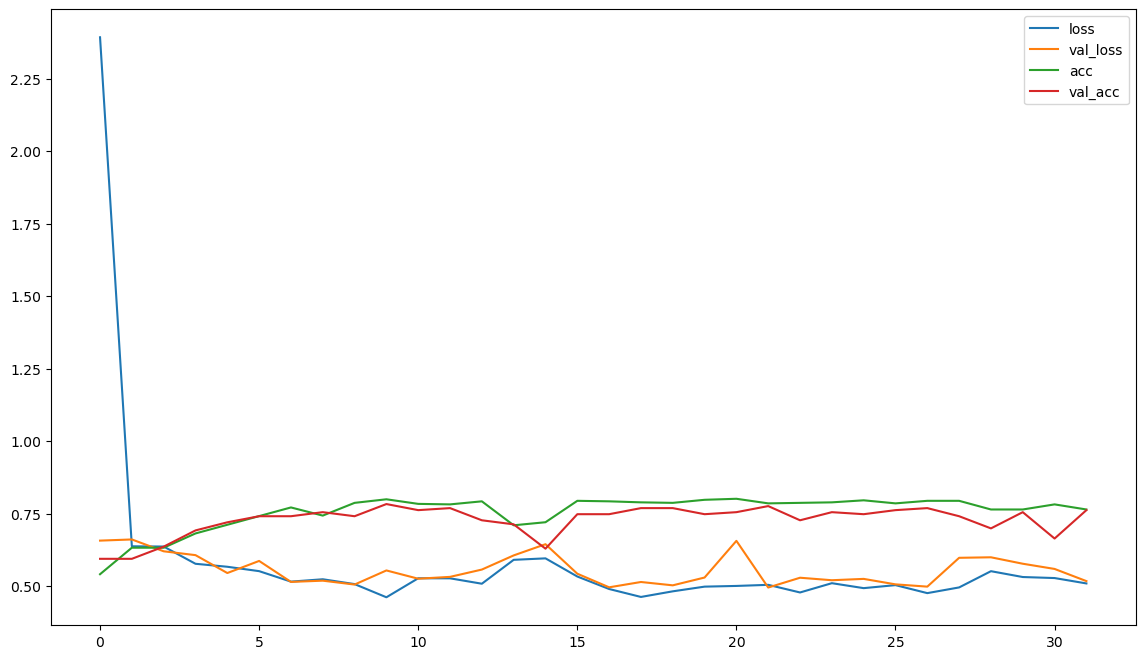

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, callbacks=[early_stopping_callback])

plt.figure(figsize=(14, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss',  'val_loss', 'acc', 'val_acc'])
plt.show()

In [37]:
# Null 처리
x_test_data['Age'] = x_test_data['Age'].fillna(x_test_data['Age'].mean())
x_test_data['Fare'] = x_test_data['Fare'].fillna(x_test_data['Fare'].mean())

prediction = model.predict(x_test_data)
prediction

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.1487282 ],
       [0.6970377 ],
       [0.1042672 ],
       [0.18604173],
       [0.7446229 ],
       [0.23313764],
       [0.7446229 ],
       [0.25133413],
       [0.8214396 ],
       [0.1992126 ],
       [0.17374386],
       [0.21923974],
       [0.97195125],
       [0.14022411],
       [0.9767963 ],
       [0.9655039 ],
       [0.1702998 ],
       [0.2211695 ],
       [0.7446229 ],
       [0.7446229 ],
       [0.33332255],
       [0.23634668],
       [0.9792818 ],
       [0.38953525],
       [0.89875996],
       [0.11726748],
       [0.9683866 ],
       [0.21575521],
       [0.2489218 ],
       [0.18002588],
       [0.15340517],
       [0.21947932],
       [0.70828944],
       [0.83372504],
       [0.36040378],
       [0.23042174],
       [0.7446229 ],
       [0.7446229 ],
       [0.1949521 ],
       [0.34531918],
       [0.18208167],
       [0.28483838],
       [0.1434448 ],
       [0.7446229 ],
       [0.9763798 ],
       [0.19041605],
       [0.27800596],
       [0.160

In [14]:
predict = model.predict(x_test_data)
predicted = tf.cast(predict > 0.5, dtype=tf.int32)
predicted = predicted.numpy()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [15]:
predicted

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [16]:
result = pd.DataFrame({'PassengerId': test_passenger_ids, 'Survived': predicted.flatten()})
result.to_csv('result.csv', index=False)